In [1]:
import torch
import matplotlib.pyplot as plt
from pylineaGT.simulations import Simulate

%load_ext autoreload
%autoreload 2

/Users/elenab/Library/r-miniconda-arm64/envs/lineagt-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
obj = Simulate(seed=4, N=50, T=4, K=6, likelihood="NB")
obj.generate_dataset()

NotImplementedError: 

In [11]:
torch.distributions.NegativeBinomial(10, 0.1).cdf(0.5)

NotImplementedError: 

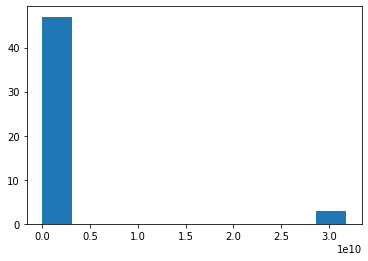

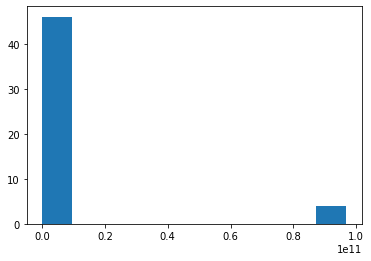

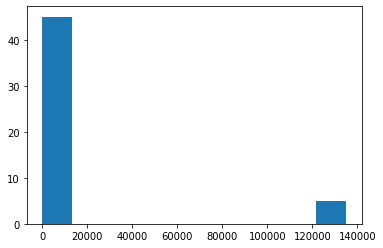

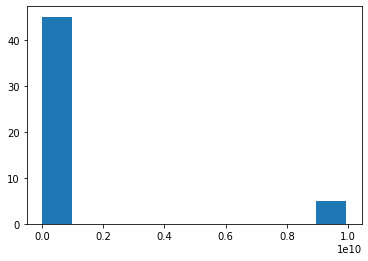

In [6]:
for i in range(obj.dataset.shape[1]):
    plt.hist(obj.dataset[:,i])
    plt.show()